In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/content/Credit Card Default Prediction_Original_Dataset.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [4]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.select_dtypes(include='object').nunique()

SEX          2
EDUCATION    6
MARRIAGE     4
default      2
dtype: int64

In [7]:
df.rename(columns={'default ':'DEFAULT'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [8]:
df = df.drop(columns=['ID'])


In [9]:
df.SEX=df.SEX.astype('category')
df.EDUCATION=df.EDUCATION.astype('category')
df.MARRIAGE=df.MARRIAGE.astype('category')
df.DEFAULT=df.DEFAULT.astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64 
 5   PAY_0      30000 non-null  int64 
 6   PAY_2      30000 non-null  int64 
 7   PAY_3      30000 non-null  int64 
 8   PAY_4      30000 non-null  int64 
 9   PAY_5      30000 non-null  int64 
 10  PAY_6      30000 non-null  int64 
 11  BILL_AMT1  30000 non-null  int64 
 12  BILL_AMT2  30000 non-null  int64 
 13  BILL_AMT3  30000 non-null  int64 
 14  BILL_AMT4  30000 non-null  int64 
 15  BILL_AMT5  30000 non-null  int64 
 16  BILL_AMT6  30000 non-null  int64 
 17  PAY_AMT1   30000 non-null  int64 
 18  PAY_AMT2   30000 non-null  int64 
 19  PAY_AMT3   30000 non-null  int64 
 20  PAY_AMT4   30000 non-null  i

EDA

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0


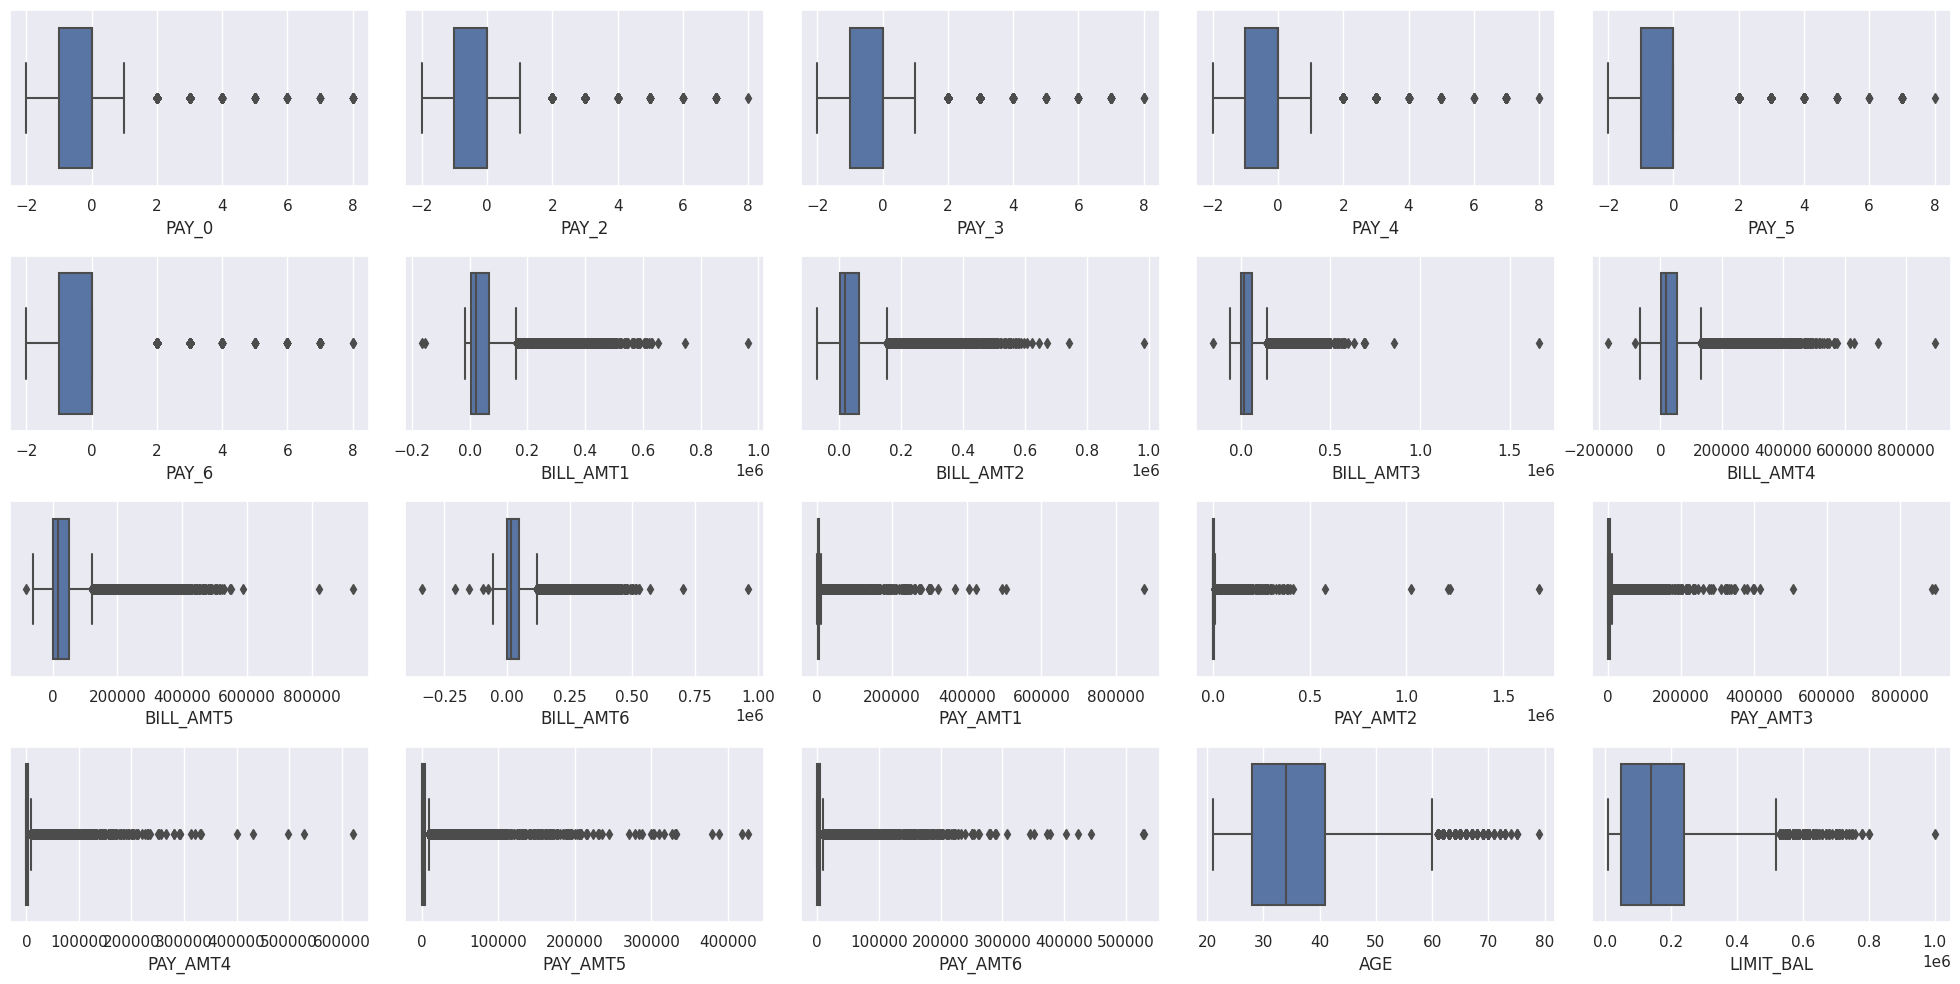

In [10]:
num_vars = ['PAY_0',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6',
                 'BILL_AMT1',	'BILL_AMT2',	'BILL_AMT3',	'BILL_AMT4',	'BILL_AMT5',	'BILL_AMT6',
                 'PAY_AMT1',	'PAY_AMT2', 'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6', 'AGE', 'LIMIT_BAL']

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

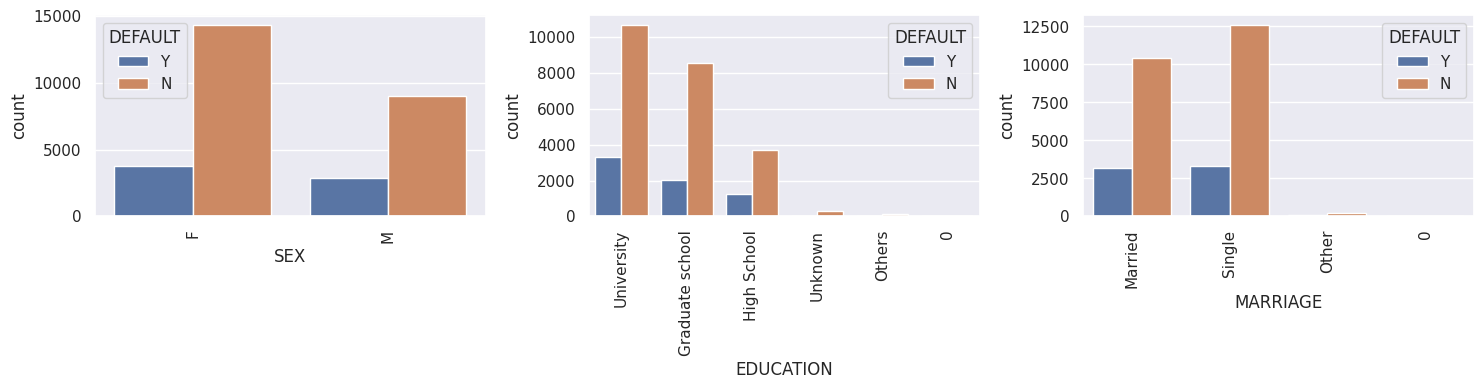

In [14]:
# list of categorical variables to plot
cat_vars = ['SEX', 'EDUCATION','MARRIAGE']
# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axs = axs.flatten()
# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='DEFAULT', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()
# show plot
plt.show()

# Remove the Outlier using Cap & Floor

In [14]:
#initializing pandas series
series = pd.Series(np.logspace(-2, 2, 100))

#set the lower and higher percentile range
lower_percentile = 0.05
higher_percentile = 0.95

#returns values at the given quantile within the specified range
low, high = series.quantile([lower_percentile, higher_percentile])

#cap values below low to low
series[series < low] = low

#cap values above high to high
series[series > high] = high

print(series)

print(lower_percentile, 'low percentile: ', low)
print(higher_percentile, 'high percentile: ', high)

0      0.015852
1      0.015852
2      0.015852
3      0.015852
4      0.015852
        ...    
95    63.109075
96    63.109075
97    63.109075
98    63.109075
99    63.109075
Length: 100, dtype: float64
0.05 low percentile:  0.015852100925988346
0.95 high percentile:  63.109074749600296


In [15]:
p_05 = df['BILL_AMT1'].quantile(0.05) # 5th quantile
p_95 = df['BILL_AMT1'].quantile(0.95) # 95th quantile
df['BILL_AMT1'].clip(p_05, p_95, inplace=True)
p_05 = df['BILL_AMT2'].quantile(0.05) # 5th quantile
p_95 = df['BILL_AMT2'].quantile(0.95) # 95th quantile
df['BILL_AMT2'].clip(p_05, p_95, inplace=True)
p_05 = df['BILL_AMT3'].quantile(0.05) # 5th quantile
p_95 = df['BILL_AMT3'].quantile(0.95) # 95th quantile
df['BILL_AMT3'].clip(p_05, p_95, inplace=True)
p_05 = df['BILL_AMT4'].quantile(0.05) # 5th quantile
p_95 = df['BILL_AMT4'].quantile(0.95) # 95th quantile
df['BILL_AMT4'].clip(p_05, p_95, inplace=True)
p_05 = df['BILL_AMT5'].quantile(0.05) # 5th quantile
p_95 = df['BILL_AMT5'].quantile(0.95) # 95th quantile
df['BILL_AMT5'].clip(p_05, p_95, inplace=True)
p_05 = df['BILL_AMT6'].quantile(0.05) # 5th quantile
p_95 = df['BILL_AMT6'].quantile(0.95) # 95th quantile
df['BILL_AMT6'].clip(p_05, p_95, inplace=True)
p_05 = df['AGE'].quantile(0.05) # 5th quantile
p_95 = df['AGE'].quantile(0.95) # 95th quantile
df['AGE'].clip(p_05, p_95, inplace=True)
p_05 = df['LIMIT_BAL'].quantile(0.05) # 5th quantile
p_95 = df['LIMIT_BAL'].quantile(0.95) # 95th quantile
df['LIMIT_BAL'].clip(p_05, p_95, inplace=True)
p_05 = df['PAY_AMT1'].quantile(0.05) # 5th quantile
p_95 = df['PAY_AMT1'].quantile(0.95) # 95th quantile
df['PAY_AMT1'].clip(p_05, p_95, inplace=True)
p_05 = df['PAY_AMT2'].quantile(0.05) # 5th quantile
p_95 = df['PAY_AMT2'].quantile(0.95) # 95th quantile
df['PAY_AMT2'].clip(p_05, p_95, inplace=True)
p_05 = df['PAY_AMT3'].quantile(0.05) # 5th quantile
p_95 = df['PAY_AMT3'].quantile(0.95) # 95th quantile
df['PAY_AMT3'].clip(p_05, p_95, inplace=True)
p_05 = df['PAY_AMT4'].quantile(0.05) # 5th quantile
p_95 = df['PAY_AMT4'].quantile(0.95) # 95th quantile
df['PAY_AMT4'].clip(p_05, p_95, inplace=True)
p_05 = df['PAY_AMT5'].quantile(0.05) # 5th quantile
p_95 = df['PAY_AMT5'].quantile(0.95) # 95th quantile
df['PAY_AMT5'].clip(p_05, p_95, inplace=True)
p_05 = df['PAY_AMT6'].quantile(0.05) # 5th quantile
p_95 = df['PAY_AMT6'].quantile(0.95) # 95th quantile
df['PAY_AMT6'].clip(p_05, p_95, inplace=True)
p_05 = df['PAY_0'].quantile(0.05) # 5th quantile
p_95 = df['PAY_0'].quantile(0.95) # 95th quantile
df['PAY_0'].clip(p_05, p_95, inplace=True)
p_05 = df['PAY_2'].quantile(0.05) # 5th quantile
p_95 = df['PAY_2'].quantile(0.95) # 95th quantile
df['PAY_2'].clip(p_05, p_95, inplace=True)
p_05 = df['PAY_3'].quantile(0.05) # 5th quantile
p_95 = df['PAY_3'].quantile(0.95) # 95th quantile
df['PAY_3'].clip(p_05, p_95, inplace=True)
p_05 = df['PAY_4'].quantile(0.05) # 5th quantile
p_95 = df['PAY_4'].quantile(0.95) # 95th quantile
df['PAY_4'].clip(p_05, p_95, inplace=True)
p_05 = df['PAY_5'].quantile(0.05) # 5th quantile
p_95 = df['PAY_5'].quantile(0.95) # 95th quantile
df['PAY_5'].clip(p_05, p_95, inplace=True)
p_05 = df['PAY_6'].quantile(0.05) # 5th quantile
p_95 = df['PAY_6'].quantile(0.95) # 95th quantile
df['PAY_6'].clip(p_05, p_95, inplace=True)

# Rechecked for Outliers

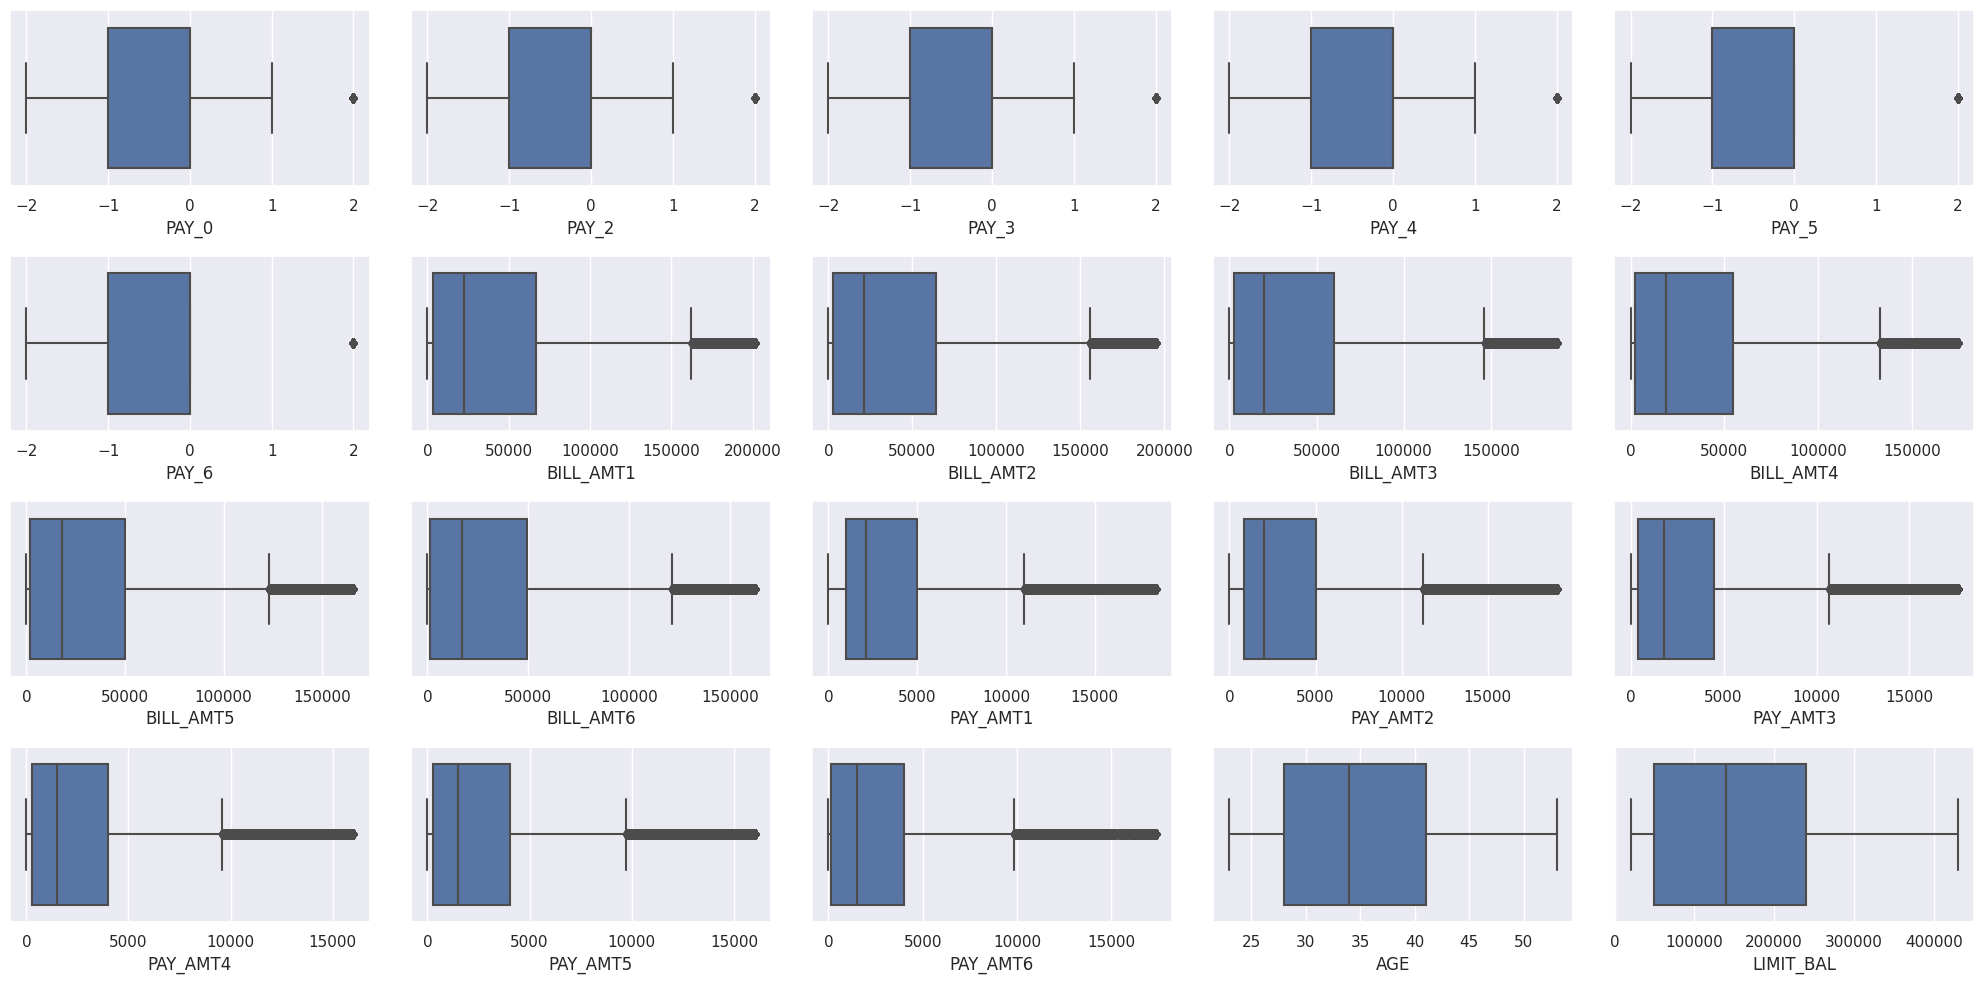

In [16]:
num_vars = ['PAY_0',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6',
                 'BILL_AMT1',	'BILL_AMT2',	'BILL_AMT3',	'BILL_AMT4',	'BILL_AMT5',	'BILL_AMT6',
                 'PAY_AMT1',	'PAY_AMT2', 'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6', 'AGE', 'LIMIT_BAL']

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  30000 non-null  int64   
 1   SEX        30000 non-null  category
 2   EDUCATION  30000 non-null  category
 3   MARRIAGE   30000 non-null  category
 4   AGE        30000 non-null  int64   
 5   PAY_0      30000 non-null  int64   
 6   PAY_2      30000 non-null  int64   
 7   PAY_3      30000 non-null  int64   
 8   PAY_4      30000 non-null  int64   
 9   PAY_5      30000 non-null  int64   
 10  PAY_6      30000 non-null  int64   
 11  BILL_AMT1  30000 non-null  float64 
 12  BILL_AMT2  30000 non-null  float64 
 13  BILL_AMT3  30000 non-null  float64 
 14  BILL_AMT4  30000 non-null  float64 
 15  BILL_AMT5  30000 non-null  float64 
 16  BILL_AMT6  30000 non-null  int64   
 17  PAY_AMT1   30000 non-null  float64 
 18  PAY_AMT2   30000 non-null  float64 
 19  PAY_AMT3   30000 non-null

In [18]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [19]:
df = df.dropna(axis=0)

In [20]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  30000 non-null  int64   
 1   SEX        30000 non-null  category
 2   EDUCATION  30000 non-null  category
 3   MARRIAGE   30000 non-null  category
 4   AGE        30000 non-null  int64   
 5   PAY_0      30000 non-null  int64   
 6   PAY_2      30000 non-null  int64   
 7   PAY_3      30000 non-null  int64   
 8   PAY_4      30000 non-null  int64   
 9   PAY_5      30000 non-null  int64   
 10  PAY_6      30000 non-null  int64   
 11  BILL_AMT1  30000 non-null  float64 
 12  BILL_AMT2  30000 non-null  float64 
 13  BILL_AMT3  30000 non-null  float64 
 14  BILL_AMT4  30000 non-null  float64 
 15  BILL_AMT5  30000 non-null  float64 
 16  BILL_AMT6  30000 non-null  int64   
 17  PAY_AMT1   30000 non-null  float64 
 18  PAY_AMT2   30000 non-null  float64 
 19  PAY_AMT3   30000 non-null

# Check for skewness

In [22]:
# Specify the columns you want to check for skewness
selected_columns = ['PAY_0',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5', 'PAY_6', 'BILL_AMT1',	'BILL_AMT2',	'BILL_AMT3',	'BILL_AMT4',	'BILL_AMT5',	'BILL_AMT6', 'PAY_AMT1',	'PAY_AMT2', 'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6', 'AGE', 'LIMIT_BAL']
# Check if all selected columns are present in the DataFrame
missing_columns = [col for col in selected_columns if col not in df.columns]
if missing_columns:
    print("Columns not found in the DataFrame:", missing_columns)
else:
    # Calculate skewness for each selected column
    skewness_values = df[selected_columns].skew()

    # Print the skewness values
    for column, skewness in skewness_values.iteritems():
        print("Skewness of {}: {:.2f}".format(column, skewness))

Skewness of PAY_0: 0.15
Skewness of PAY_2: 0.40
Skewness of PAY_3: 0.39
Skewness of PAY_4: 0.37
Skewness of PAY_5: 0.33
Skewness of PAY_6: 0.35
Skewness of BILL_AMT1: 1.45
Skewness of BILL_AMT2: 1.46
Skewness of BILL_AMT3: 1.49
Skewness of BILL_AMT4: 1.51
Skewness of BILL_AMT5: 1.54
Skewness of BILL_AMT6: 1.54
Skewness of PAY_AMT1: 1.77
Skewness of PAY_AMT2: 1.87
Skewness of PAY_AMT3: 1.90
Skewness of PAY_AMT4: 1.87
Skewness of PAY_AMT5: 1.87
Skewness of PAY_AMT6: 2.00
Skewness of AGE: 0.49
Skewness of LIMIT_BAL: 0.71


<ipython-input-22-a8cf3e511051>:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, skewness in skewness_values.iteritems():


<ipython-input-23-4b1bca5c3f85>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), fmt='.2g', annot=True)


<Axes: >

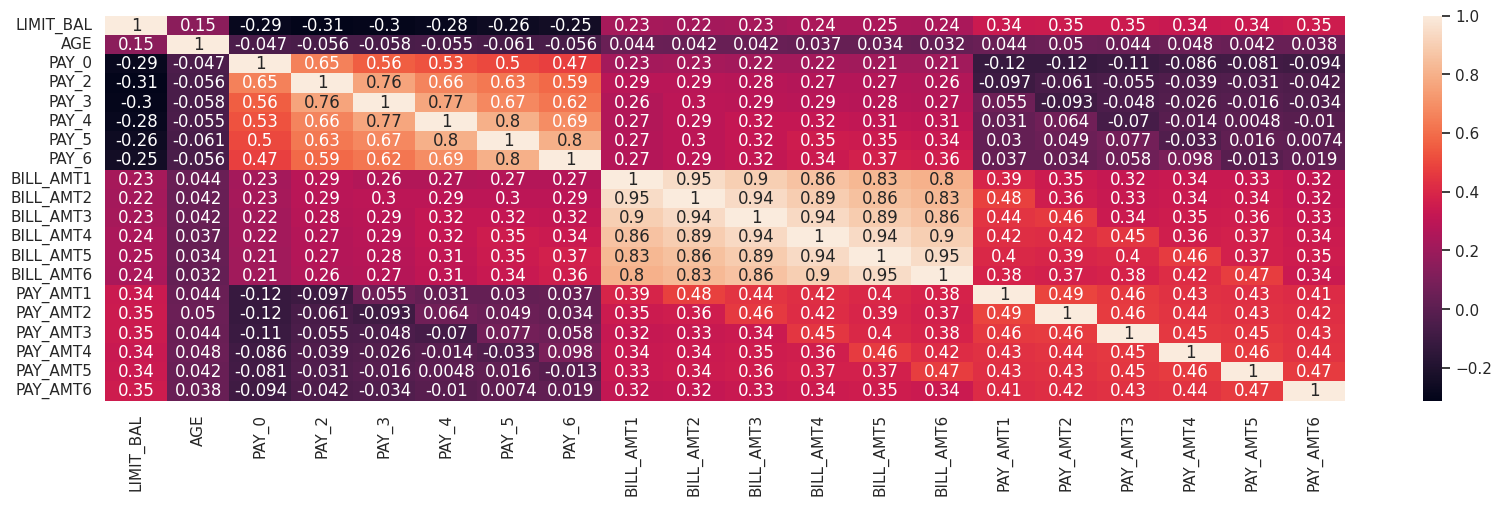

In [23]:
#Correlation Heatmap
plt.figure(figsize=(20, 5))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Build Machine Learning Model with Hyperparameter Tuning

In [24]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [25]:
X = df.drop('DEFAULT_Y', axis=1)
y = df['DEFAULT_Y']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LIMIT_BAL                  30000 non-null  int64  
 1   AGE                        30000 non-null  int64  
 2   PAY_0                      30000 non-null  int64  
 3   PAY_2                      30000 non-null  int64  
 4   PAY_3                      30000 non-null  int64  
 5   PAY_4                      30000 non-null  int64  
 6   PAY_5                      30000 non-null  int64  
 7   PAY_6                      30000 non-null  int64  
 8   BILL_AMT1                  30000 non-null  float64
 9   BILL_AMT2                  30000 non-null  float64
 10  BILL_AMT3                  30000 non-null  float64
 11  BILL_AMT4                  30000 non-null  float64
 12  BILL_AMT5                  30000 non-null  float64
 13  BILL_AMT6                  30000 non-null  int

In [27]:
uint8Columns = [c for c in df.columns if df[c].dtype == 'uint8']
df[uint8Columns] = df[uint8Columns].astype('float64')
intColumns = [c for c in df.columns if df[c].dtype == 'int']
df[intColumns] = df[intColumns].astype('float64')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LIMIT_BAL                  30000 non-null  float64
 1   AGE                        30000 non-null  float64
 2   PAY_0                      30000 non-null  float64
 3   PAY_2                      30000 non-null  float64
 4   PAY_3                      30000 non-null  float64
 5   PAY_4                      30000 non-null  float64
 6   PAY_5                      30000 non-null  float64
 7   PAY_6                      30000 non-null  float64
 8   BILL_AMT1                  30000 non-null  float64
 9   BILL_AMT2                  30000 non-null  float64
 10  BILL_AMT3                  30000 non-null  float64
 11  BILL_AMT4                  30000 non-null  float64
 12  BILL_AMT5                  30000 non-null  float64
 13  BILL_AMT6                  30000 non-null  flo

Treat skewness

In [29]:
#create log-transformed data
data_log = np.sqrt(df)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


# Skewness Rechecked

In [30]:
# Specify the columns you want to check for skewness
selected_columns = ['PAY_0',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6', 'BILL_AMT1',	'BILL_AMT2',	'BILL_AMT3',	'BILL_AMT4',	'BILL_AMT5',	'BILL_AMT6', 'PAY_AMT1',	'PAY_AMT2', 'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6', 'AGE', 'LIMIT_BAL']
# Check if all selected columns are present in the DataFrame
missing_columns = [col for col in selected_columns if col not in data_log.columns]
if missing_columns:
    print("Columns not found in the DataFrame:", missing_columns)
else:
    # Calculate skewness for each selected column
    skewness_values = data_log[selected_columns].skew()

    # Print the skewness values
    for column, skewness in skewness_values.iteritems():
        print("Skewness of {}: {:.2f}".format(column, skewness))

Skewness of PAY_0: 0.93
Skewness of PAY_2: 1.35
Skewness of PAY_3: 1.42
Skewness of PAY_4: 1.70
Skewness of PAY_5: 1.97
Skewness of PAY_6: 1.87
Skewness of BILL_AMT1: 0.56
Skewness of BILL_AMT2: 0.55
Skewness of BILL_AMT3: 0.56
Skewness of BILL_AMT4: 0.58
Skewness of BILL_AMT5: 0.60
Skewness of BILL_AMT6: 0.61
Skewness of PAY_AMT1: 0.50
Skewness of PAY_AMT2: 0.58
Skewness of PAY_AMT3: 0.65
Skewness of PAY_AMT4: 0.67
Skewness of PAY_AMT5: 0.66
Skewness of PAY_AMT6: 0.74
Skewness of AGE: 0.32
Skewness of LIMIT_BAL: 0.17


<ipython-input-30-306bbe18a233>:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, skewness in skewness_values.iteritems():


In [31]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_M,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single,DEFAULT_Y
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.00,1000.0,1000.0,0.0,2000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.00,1000.0,1000.0,1000.0,5000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.00,1200.0,1100.0,1069.0,1000.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,50000.0,53.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,19004.35,10000.0,9000.0,689.0,679.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [32]:
data_log['DEFAULT_Y'].value_counts()

0.0    23364
1.0     6636
Name: DEFAULT_Y, dtype: int64

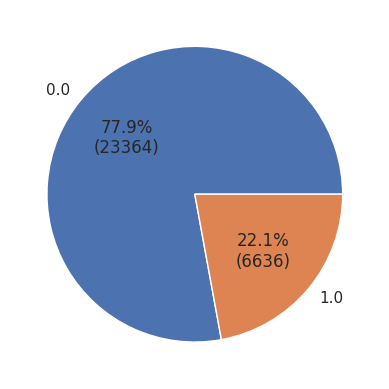

In [33]:
# Creating plot
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = df['DEFAULT_Y'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LIMIT_BAL                  30000 non-null  float64
 1   AGE                        30000 non-null  float64
 2   PAY_0                      30000 non-null  float64
 3   PAY_2                      30000 non-null  float64
 4   PAY_3                      30000 non-null  float64
 5   PAY_4                      30000 non-null  float64
 6   PAY_5                      30000 non-null  float64
 7   PAY_6                      30000 non-null  float64
 8   BILL_AMT1                  30000 non-null  float64
 9   BILL_AMT2                  30000 non-null  float64
 10  BILL_AMT3                  30000 non-null  float64
 11  BILL_AMT4                  30000 non-null  float64
 12  BILL_AMT5                  30000 non-null  float64
 13  BILL_AMT6                  30000 non-null  flo

In [35]:
#test size 50% and train size 50%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5,random_state=0)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8,9,10],
    'min_samples_split': [2, 3, 4,6,8,10],
    'min_samples_leaf': [1, 2, 3, 4,5,6,7,8,9]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=0)

In [ ]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 81.8 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.818
Precision Score :  0.818
Recall Score :  0.818
Jaccard Score :  0.6920473773265652
Log Loss :  6.559944916819322


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15,],
    'max_features': ['sqrt', 'log2', None]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': None, 'n_estimators': 300}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=10, max_features='sqrt', n_estimators=300)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 82.37 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8236666666666665
Precision Score :  0.8236666666666667
Recall Score :  0.8236666666666667
Jaccard Score :  0.7001983564749221
Log Loss :  6.355697547614325


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state=0)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga']
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

{'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [ ]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 81.51 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8150666666666667
Precision Score :  0.8150666666666667
Recall Score :  0.8150666666666667
Jaccard Score :  0.6878586699673681
Log Loss :  6.665672966760733


# Confusion Matrix


In [ ]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=4, min_samples_split=2)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8178666666666666')

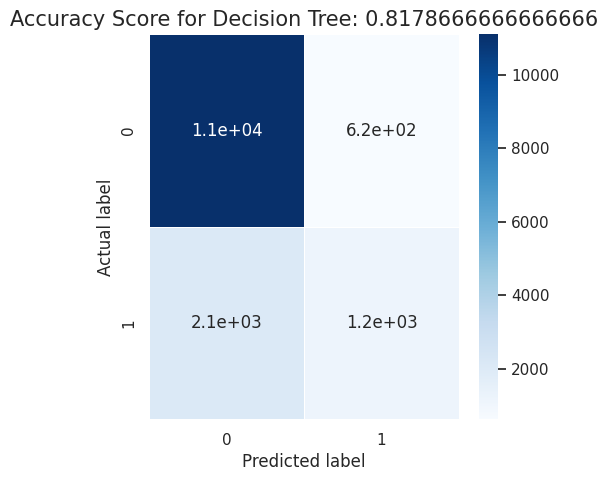

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
rfc = RandomForestClassifier(random_state=0, max_depth=10, max_features='sqrt', n_estimators=300)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8236666666666667')

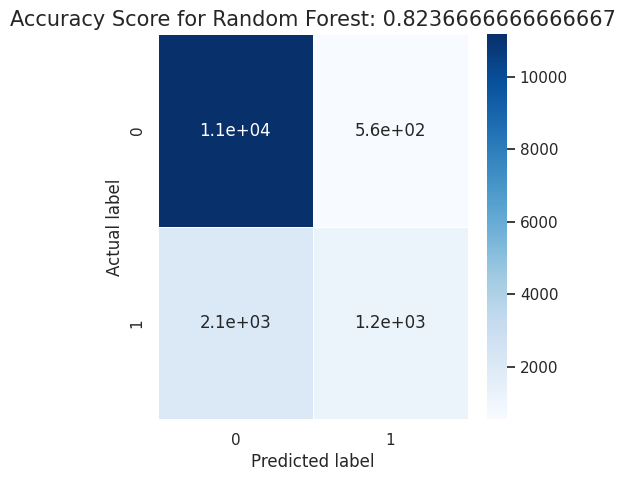

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
lr = LogisticRegression(random_state=0, solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score for Logistic Regression: 0.8150666666666667')

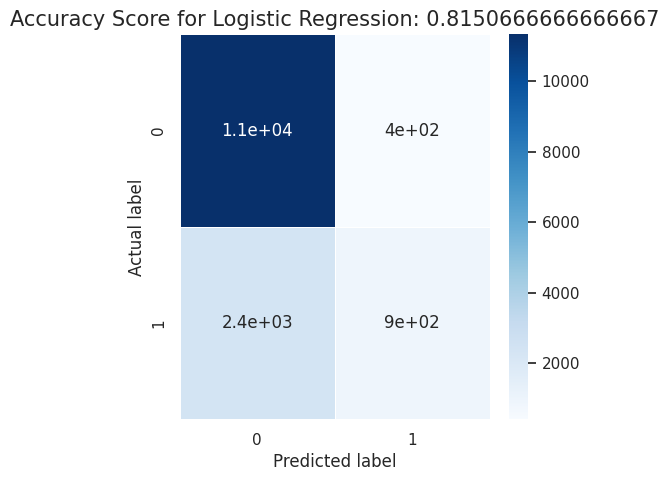

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(lr.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

ROC AUC Curve

# Decision Tree

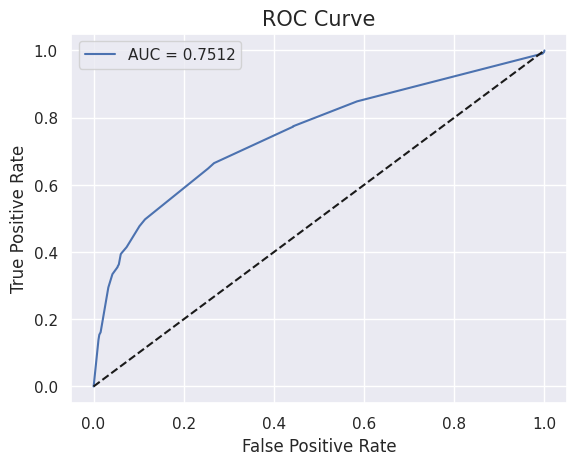

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest

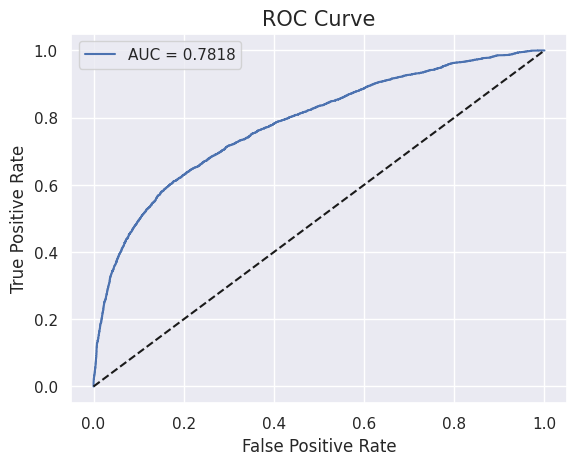

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

Logistic Regression

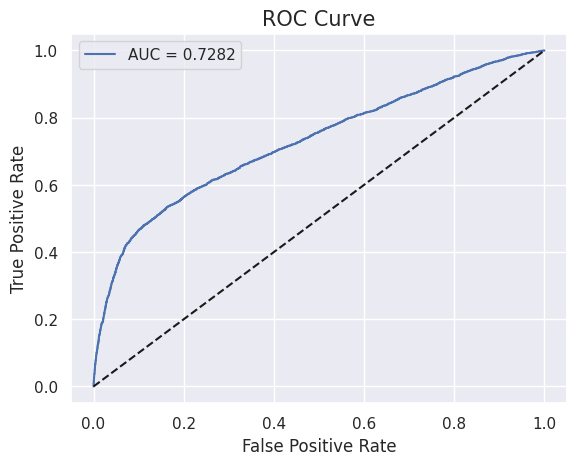

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = lr.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

Feature Importances

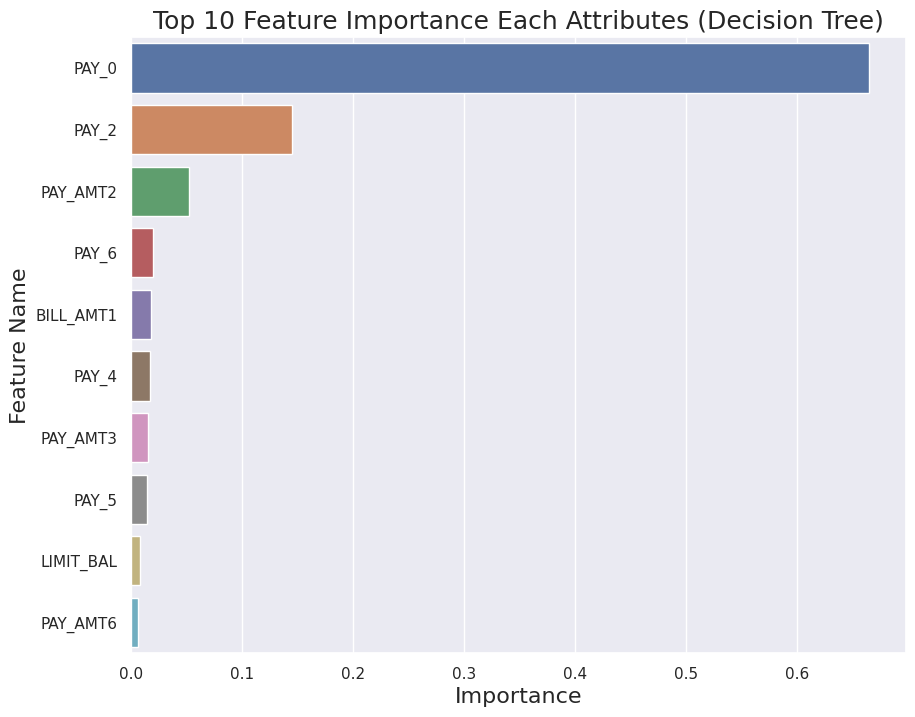

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

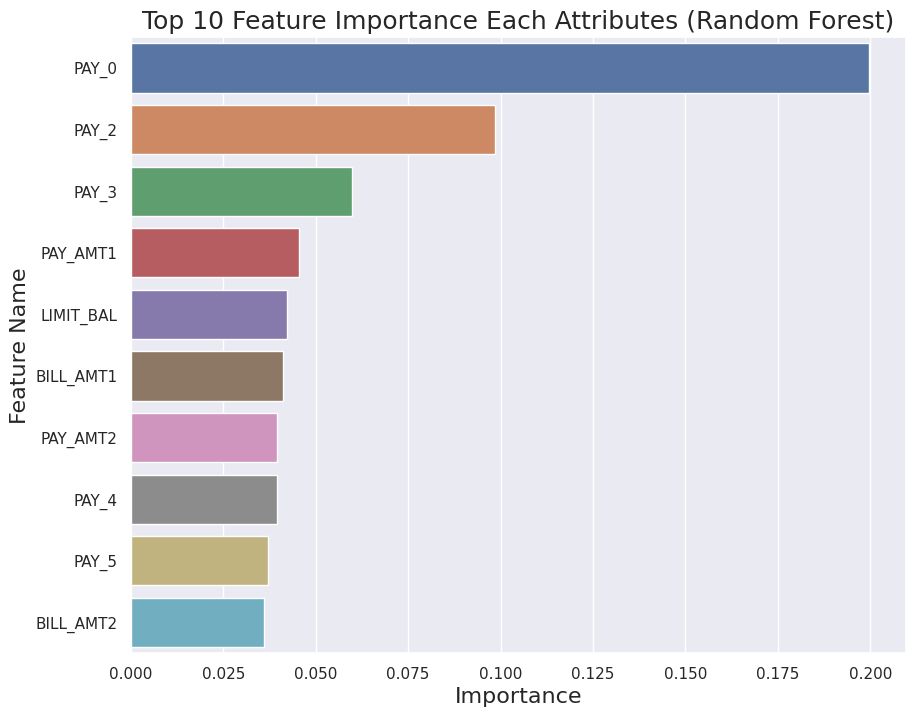

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Neural Network

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

!pip install dmba
from dmba import classificationSummary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.5 MB/s eta 0:00:00
Colab environment detected.


In [37]:
clf = MLPClassifier(random_state=0, activation='logistic', solver='lbfgs', hidden_layer_sizes=4)
clf.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=4, random_state=0,
              solver='lbfgs')

In [38]:
clf.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [39]:
clf.coefs_

[array([[ 0.06916921,  0.14402795, -0.63383065, -0.12975631],
        [-0.03759805,  0.0716352 , -0.03098286,  0.19284758],
        [ 0.22829212, -0.05745872,  0.14363771,  0.01422676],
        [ 0.03350355,  0.20953553, -0.21120702, -0.20328324],
        [-0.23622743,  0.16376034,  0.13695624,  0.18218178],
        [ 0.23565538,  0.1472875 , -0.01896492,  0.13812373],
        [-0.18794828,  0.06887282, -0.17559852,  0.21894045],
        [ 0.01075776, -0.04208395, -0.1159224 ,  0.13502365],
        [ 0.04026778,  0.044484  , -0.60689486,  0.04334222],
        [ 0.06683375,  0.0529426 , -0.13159476,  0.08209252],
        [-0.06789038, -0.04591942, -0.21800588, -0.22482816],
        [ 0.08655183,  0.02367983, -0.43647779, -0.18418545],
        [-0.09031136, -0.11687158, -0.21402459, -0.03175995],
        [ 0.23981556, -0.22101271, -0.39054788, -0.16858437],
        [ 0.07167101, -0.11453866, -0.04682303, -0.13120614],
        [-0.17079285, -0.18907178,  0.02939741, -0.18382046],
        

In [40]:
classificationSummary(y, clf.predict(X))

Confusion Matrix (Accuracy 0.7788)

       Prediction
Actual     0     1
     0 23364     0
     1  6636     0


In [42]:
pd.concat([df, pd.DataFrame(clf.predict_proba(X))], axis=1)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_M,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single,DEFAULT_Y,0,1
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.00,0.0,0.0,0.0,0.0,689.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.808380,0.191620
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.00,3272.0,3455.0,3261.0,0.0,1000.00,1000.0,1000.0,0.0,2000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.808380,0.191620
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.00,14331.0,14948.0,15549.0,1518.0,1500.00,1000.0,1000.0,1000.0,5000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.808380,0.191620
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.00,28314.0,28959.0,29547.0,2000.0,2019.00,1200.0,1100.0,1069.0,1000.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.711579,0.288421
4,50000.0,53.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.00,20940.0,19146.0,19131.0,2000.0,19004.35,10000.0,9000.0,689.0,679.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.711579,0.288421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,187821.05,88004.0,31237.0,15980.0,8500.0,19004.35,5003.0,3047.0,5000.0,1000.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.808380,0.191620
29996,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.00,8979.0,5190.0,0.0,1837.0,3526.00,8998.0,129.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.808380,0.191620
29997,30000.0,37.0,2.0,2.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.00,20878.0,20582.0,19357.0,0.0,0.00,17589.4,4200.0,2000.0,3100.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.711579,0.288421
29998,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,78379.0,76304.00,52774.0,11855.0,48944.0,18428.2,3409.00,1178.0,1926.0,16000.0,1804.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.711579,0.288421


In [43]:
classes = y.unique()
pd.concat([df, pd.DataFrame(clf.predict_proba(X), columns=classes)], axis=1)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_M,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single,DEFAULT_Y,1,0
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.00,0.0,0.0,0.0,0.0,689.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.808380,0.191620
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.00,3272.0,3455.0,3261.0,0.0,1000.00,1000.0,1000.0,0.0,2000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.808380,0.191620
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.00,14331.0,14948.0,15549.0,1518.0,1500.00,1000.0,1000.0,1000.0,5000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.808380,0.191620
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.00,28314.0,28959.0,29547.0,2000.0,2019.00,1200.0,1100.0,1069.0,1000.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.711579,0.288421
4,50000.0,53.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.00,20940.0,19146.0,19131.0,2000.0,19004.35,10000.0,9000.0,689.0,679.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.711579,0.288421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,187821.05,88004.0,31237.0,15980.0,8500.0,19004.35,5003.0,3047.0,5000.0,1000.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.808380,0.191620
29996,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.00,8979.0,5190.0,0.0,1837.0,3526.00,8998.0,129.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.808380,0.191620
29997,30000.0,37.0,2.0,2.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.00,20878.0,20582.0,19357.0,0.0,0.00,17589.4,4200.0,2000.0,3100.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.711579,0.288421
29998,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,78379.0,76304.00,52774.0,11855.0,48944.0,18428.2,3409.00,1178.0,1926.0,16000.0,1804.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.711579,0.288421


In [44]:
classes = sorted(y.unique())
pd.concat([df, pd.DataFrame(clf.predict_proba(X), columns=classes)], axis=1)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_M,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single,DEFAULT_Y,0,1
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.00,0.0,0.0,0.0,0.0,689.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.808380,0.191620
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.00,3272.0,3455.0,3261.0,0.0,1000.00,1000.0,1000.0,0.0,2000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.808380,0.191620
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.00,14331.0,14948.0,15549.0,1518.0,1500.00,1000.0,1000.0,1000.0,5000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.808380,0.191620
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.00,28314.0,28959.0,29547.0,2000.0,2019.00,1200.0,1100.0,1069.0,1000.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.711579,0.288421
4,50000.0,53.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.00,20940.0,19146.0,19131.0,2000.0,19004.35,10000.0,9000.0,689.0,679.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.711579,0.288421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,187821.05,88004.0,31237.0,15980.0,8500.0,19004.35,5003.0,3047.0,5000.0,1000.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.808380,0.191620
29996,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.00,8979.0,5190.0,0.0,1837.0,3526.00,8998.0,129.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.808380,0.191620
29997,30000.0,37.0,2.0,2.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.00,20878.0,20582.0,19357.0,0.0,0.00,17589.4,4200.0,2000.0,3100.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.711579,0.288421
29998,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,78379.0,76304.00,52774.0,11855.0,48944.0,18428.2,3409.00,1178.0,1926.0,16000.0,1804.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.711579,0.288421


In [45]:
classificationSummary(y, clf.predict(X), class_names=classes)

Confusion Matrix (Accuracy 0.7788)

       Prediction
Actual     0     1
     0 23364     0
     1  6636     0


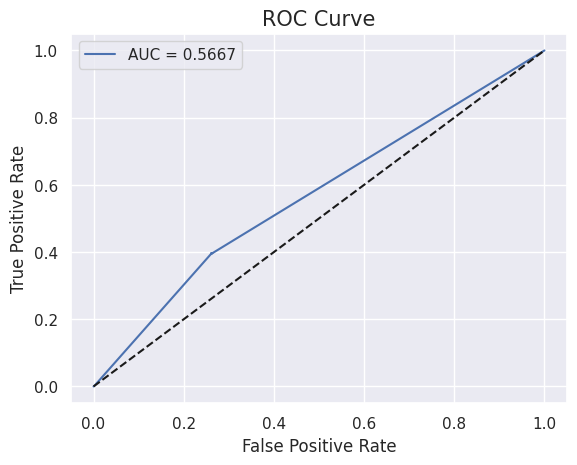

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = clf.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

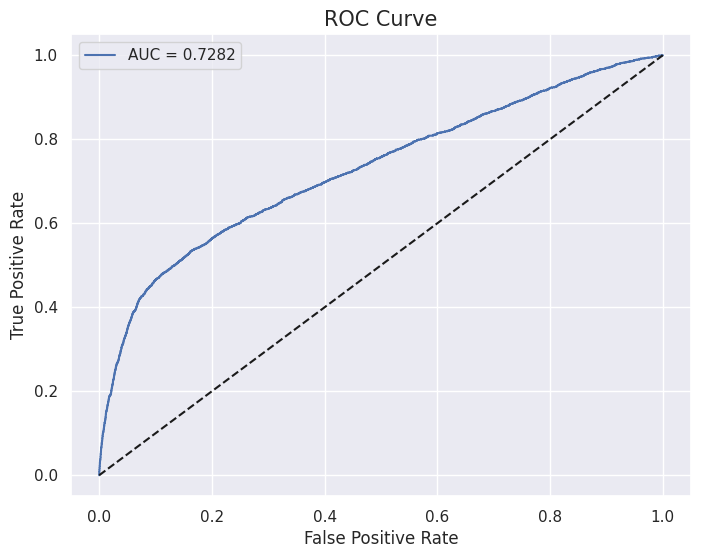

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='AUC = %0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=15)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = clf.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()